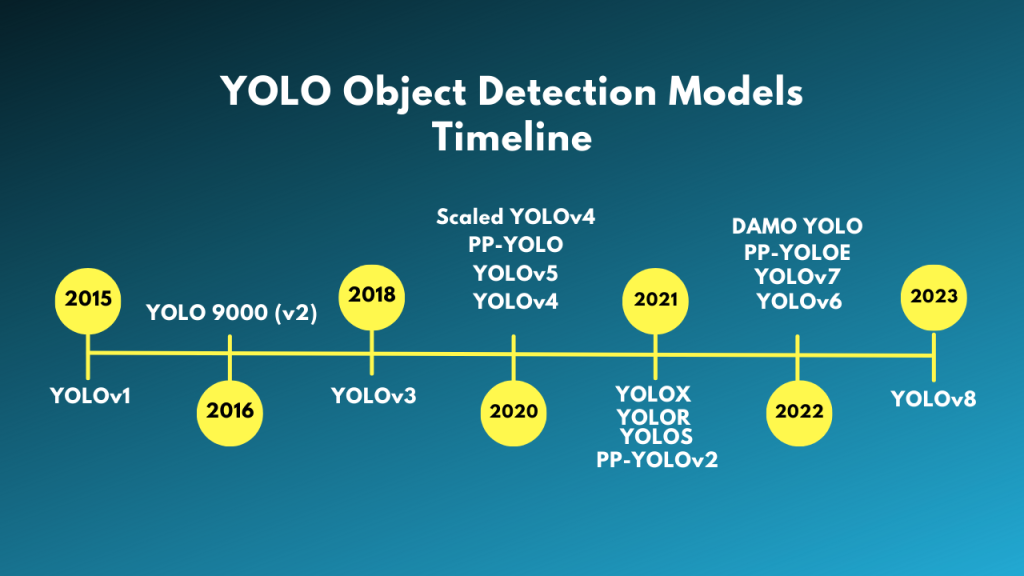

GPU -> colab

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# installs & Imports

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/107.7 GB disk)


In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

# Dataset

Descargando un dataset de kaggle

* Debemos ir a nuestra cuenta de kaggle / setting, generamos un Api token y es el json que nos pide subir
* Despues descargamos el dataset y lo descomprimimos en la carpeta train

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jonnatanariasgarcia","key":"49b5a2f1ee06c09d327c73e7118b49ae"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                  title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows               Netflix Movies and TV Shows                      1MB  2024-04-10 09:48:38           5226        109  1.0              
sahirmaharajj/youth-tobacco-survey                   Youth Tobacco Dataset (2 Decades)              264KB  2024-04-11 20:19:31           1116         23  1.0              
mexwell/heart-disease-dataset                        🫀 Heart Disease Dataset                        399KB  2024-04-08 09:43:49           2770         49  1.0              
ultimus/football-salaries-dataset                    Football Player Salaries Dataset                 2MB  2024-04-15 17:56:44            92

Descargamos dataset, en este caso coco car damage

In [ ]:
!kaggle datasets download -d pkdarabi/cardetection

cardetection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! mkdir cardetection
! unzip cardetection.zip -d cardetection

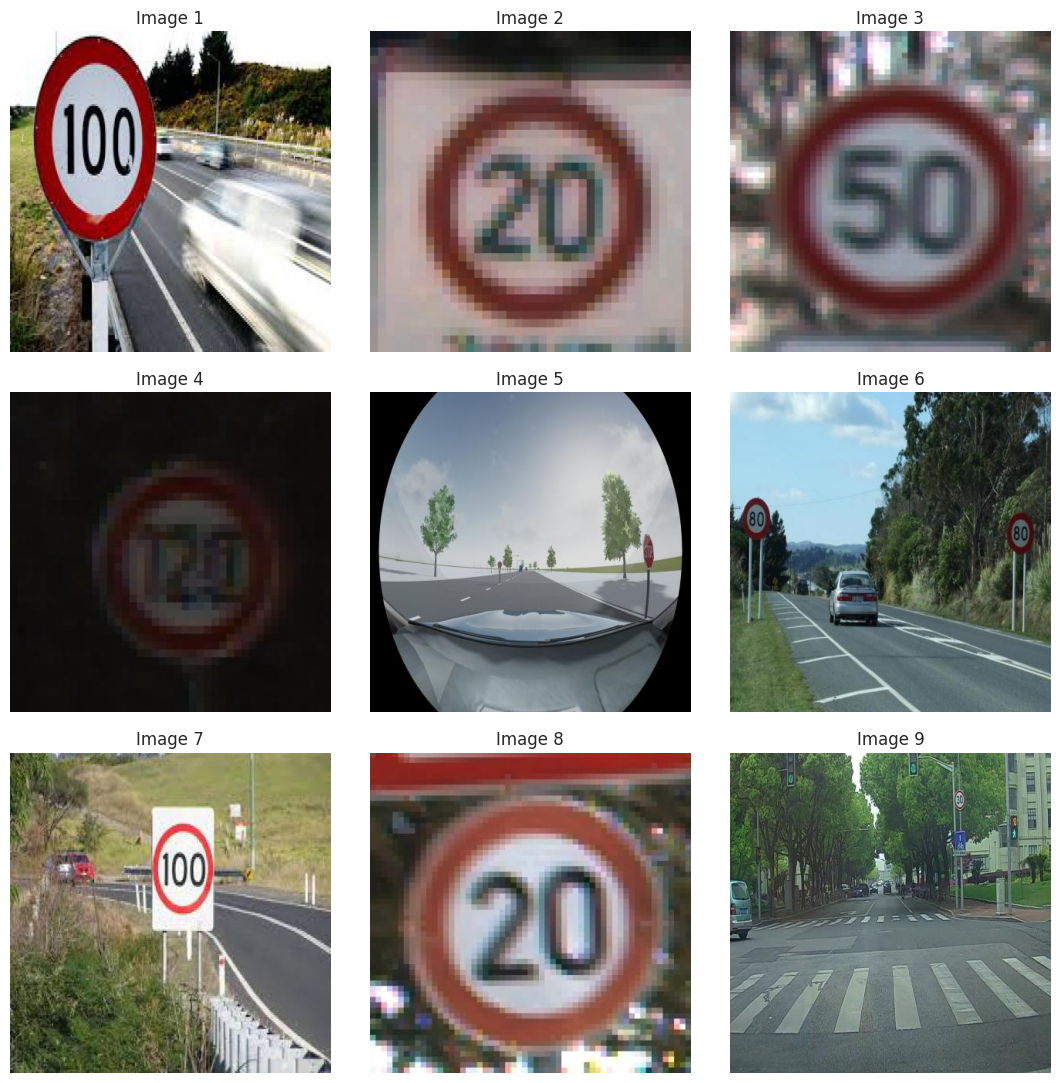

In [ ]:
root_dir ='/content/cardetection'
Image_dir = root_dir+'/train/images'
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Shape de la imagen para usar en el train step

In [ ]:
# Get the size of the image
image = cv2.imread(root_dir+"/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"La imagen tiene dimensiones {w}x{h} y {c} channels.")

La imagen tiene dimensiones 416x416 y 3 channels.


# Pre-trained YOLOv8


image 1/1 /content/cardetection/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 514.4ms
Speed: 1.7ms preprocess, 514.4ms inference, 9.4ms postprocess per image at shape (1, 3, 416, 416)


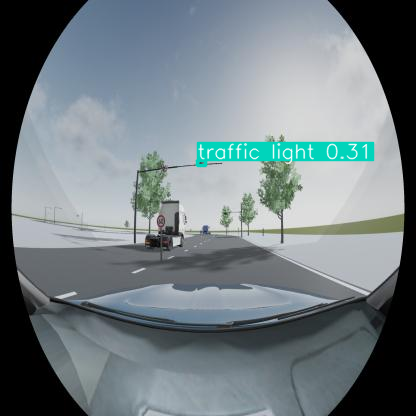

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = root_dir+"/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"

result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# YOLOv8-Based Train

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model
#device=0 es gpu
Result_Final_model = Final_model.train(data= root_dir+"/data.yaml",epochs=2, imgsz = 416, batch = 64 ,lr0=0.001, dropout= 0.15, device ='cpu')

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/cardetection/data.yaml, epochs=2, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

train: Scanning /content/cardetection/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/cardetection/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G     0.8204      3.451      1.083         26        416: 100%|██████████| 56/56 [25:58<00:00, 27.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [02:11<00:00, 18.78s/it]

                   all        801        944     0.0488      0.783      0.158      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      0.701      2.361      1.011         23        416: 100%|██████████| 56/56 [26:15<00:00, 28.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [02:05<00:00, 17.95s/it]

                   all        801        944      0.327      0.354      0.271      0.228



2 epochs completed in 0.944 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:54<00:00, 16.30s/it]


                   all        801        944      0.326      0.354      0.271      0.228
           Green Light        801        122      0.594      0.132      0.286      0.153
             Red Light        801        108       0.28     0.0926      0.179     0.0967
       Speed Limit 100        801         52      0.159      0.102      0.121      0.107
       Speed Limit 110        801         17      0.148      0.176      0.208      0.196
       Speed Limit 120        801         60      0.212      0.517      0.243      0.215
        Speed Limit 20        801         56      0.217      0.893      0.669      0.569
        Speed Limit 30        801         74      0.178      0.581      0.169      0.152
        Speed Limit 40        801         55      0.216       0.11      0.243      0.202
        Speed Limit 50        801         71      0.131      0.451      0.125       0.11
        Speed Limit 60        801         76      0.169      0.474      0.145       0.13
        Speed Limit 7

## validation

In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

In [ ]:
%ls /content/runs

detect/


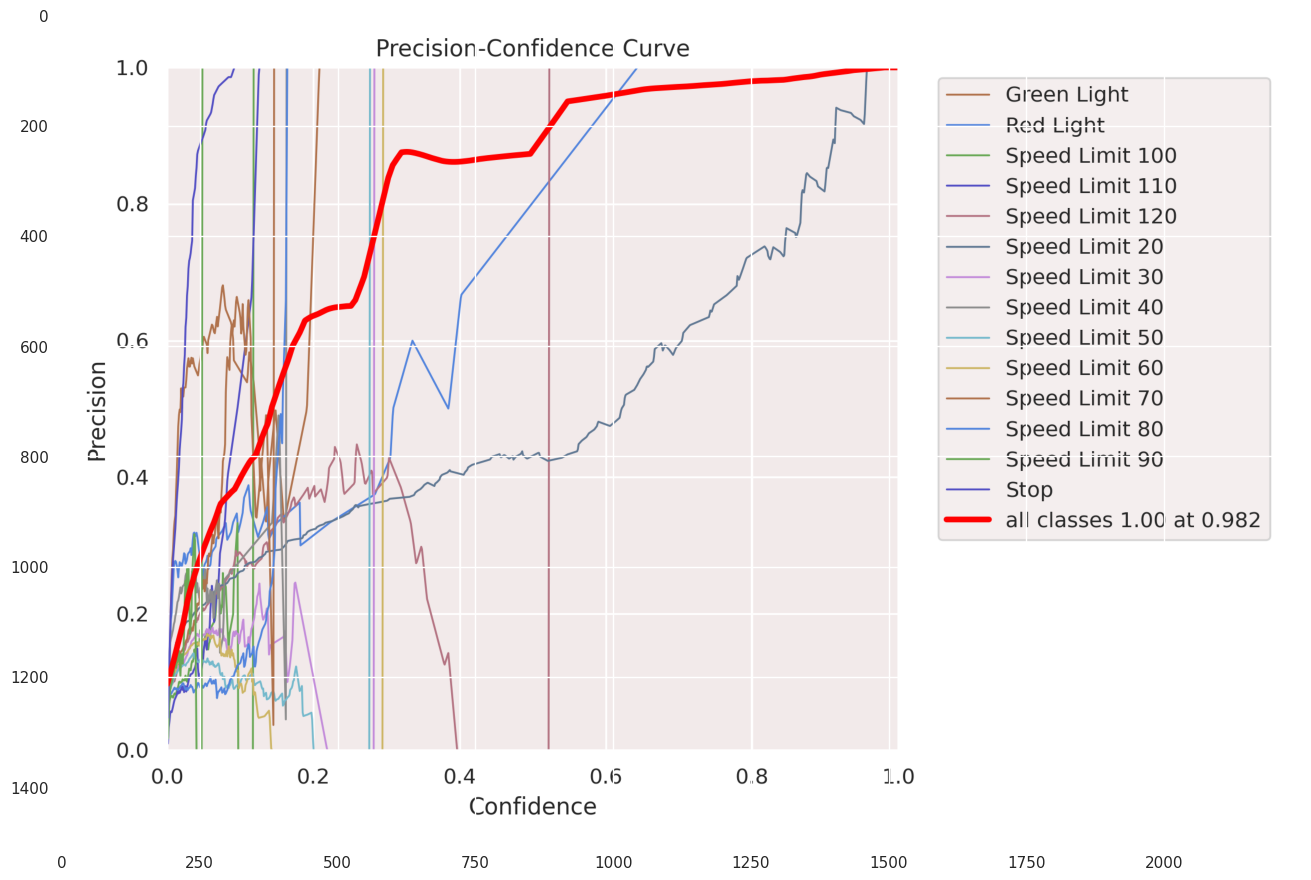

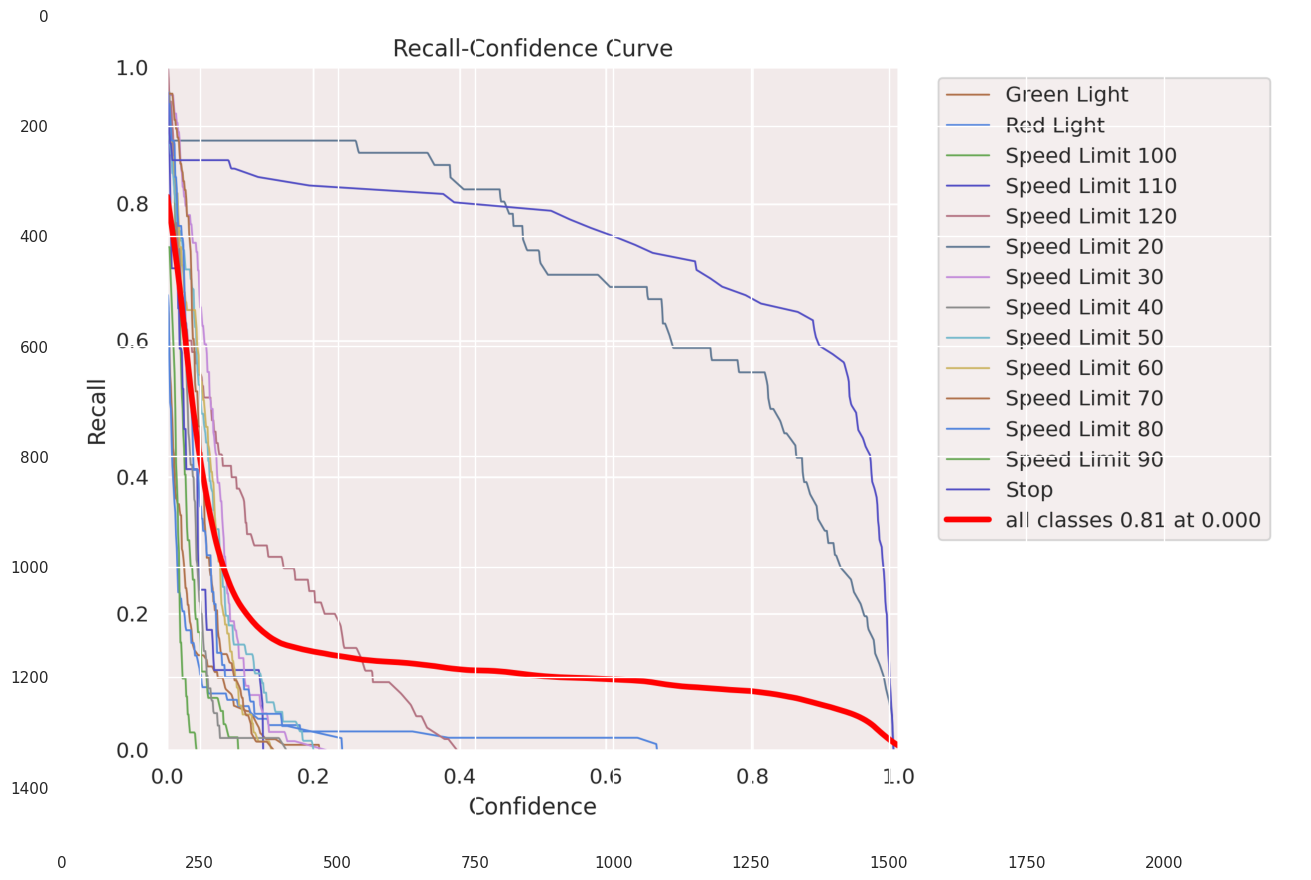

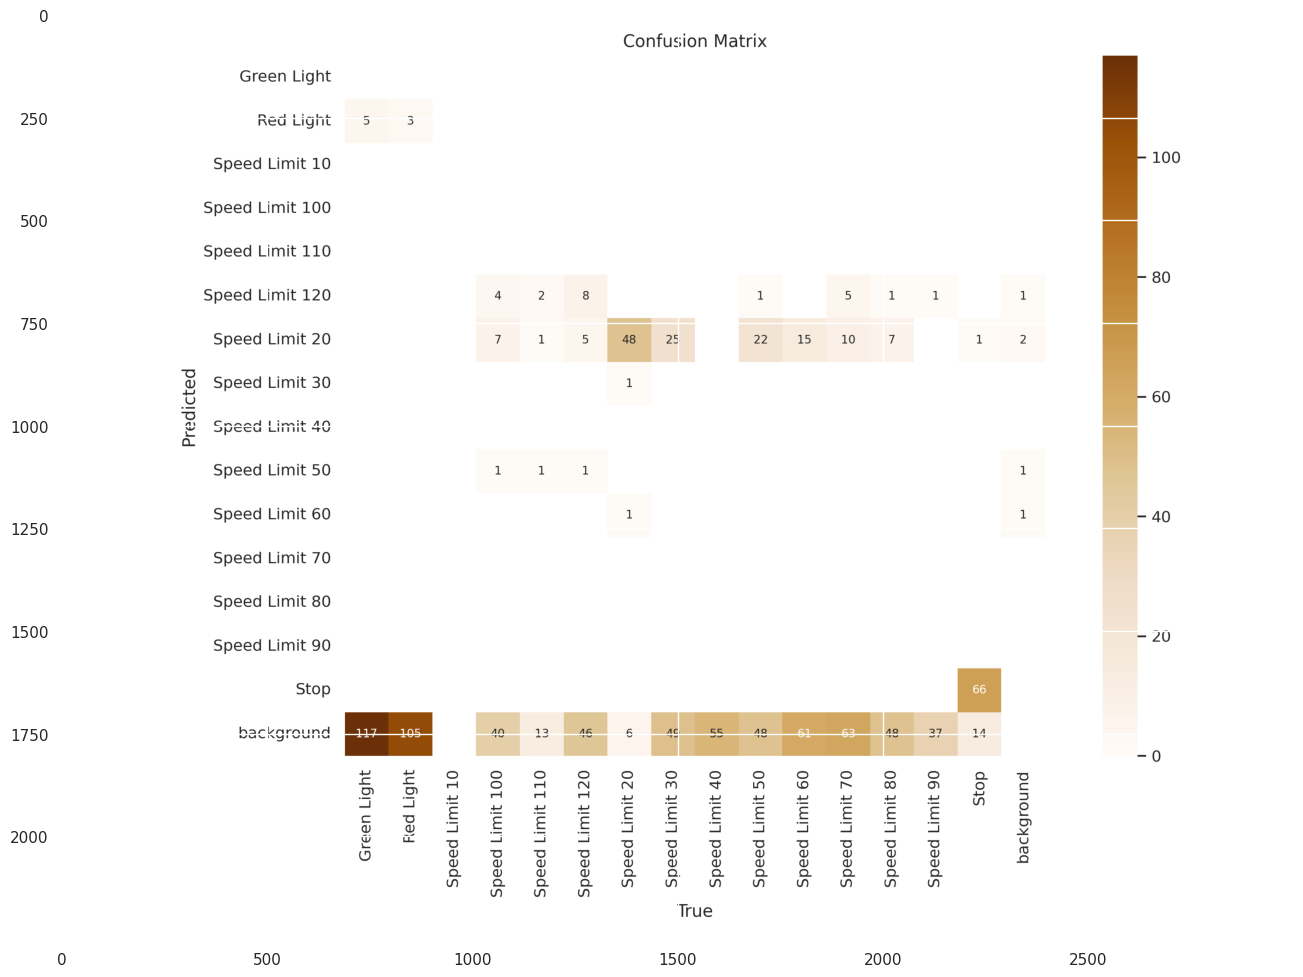

In [ ]:
# Load the image
for i in list_of_metrics:

    image = cv2.imread(f'/content/runs/detect/train2/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train2/results.csv')
Result_Final_model.tail(10)
df = Result_Final_model

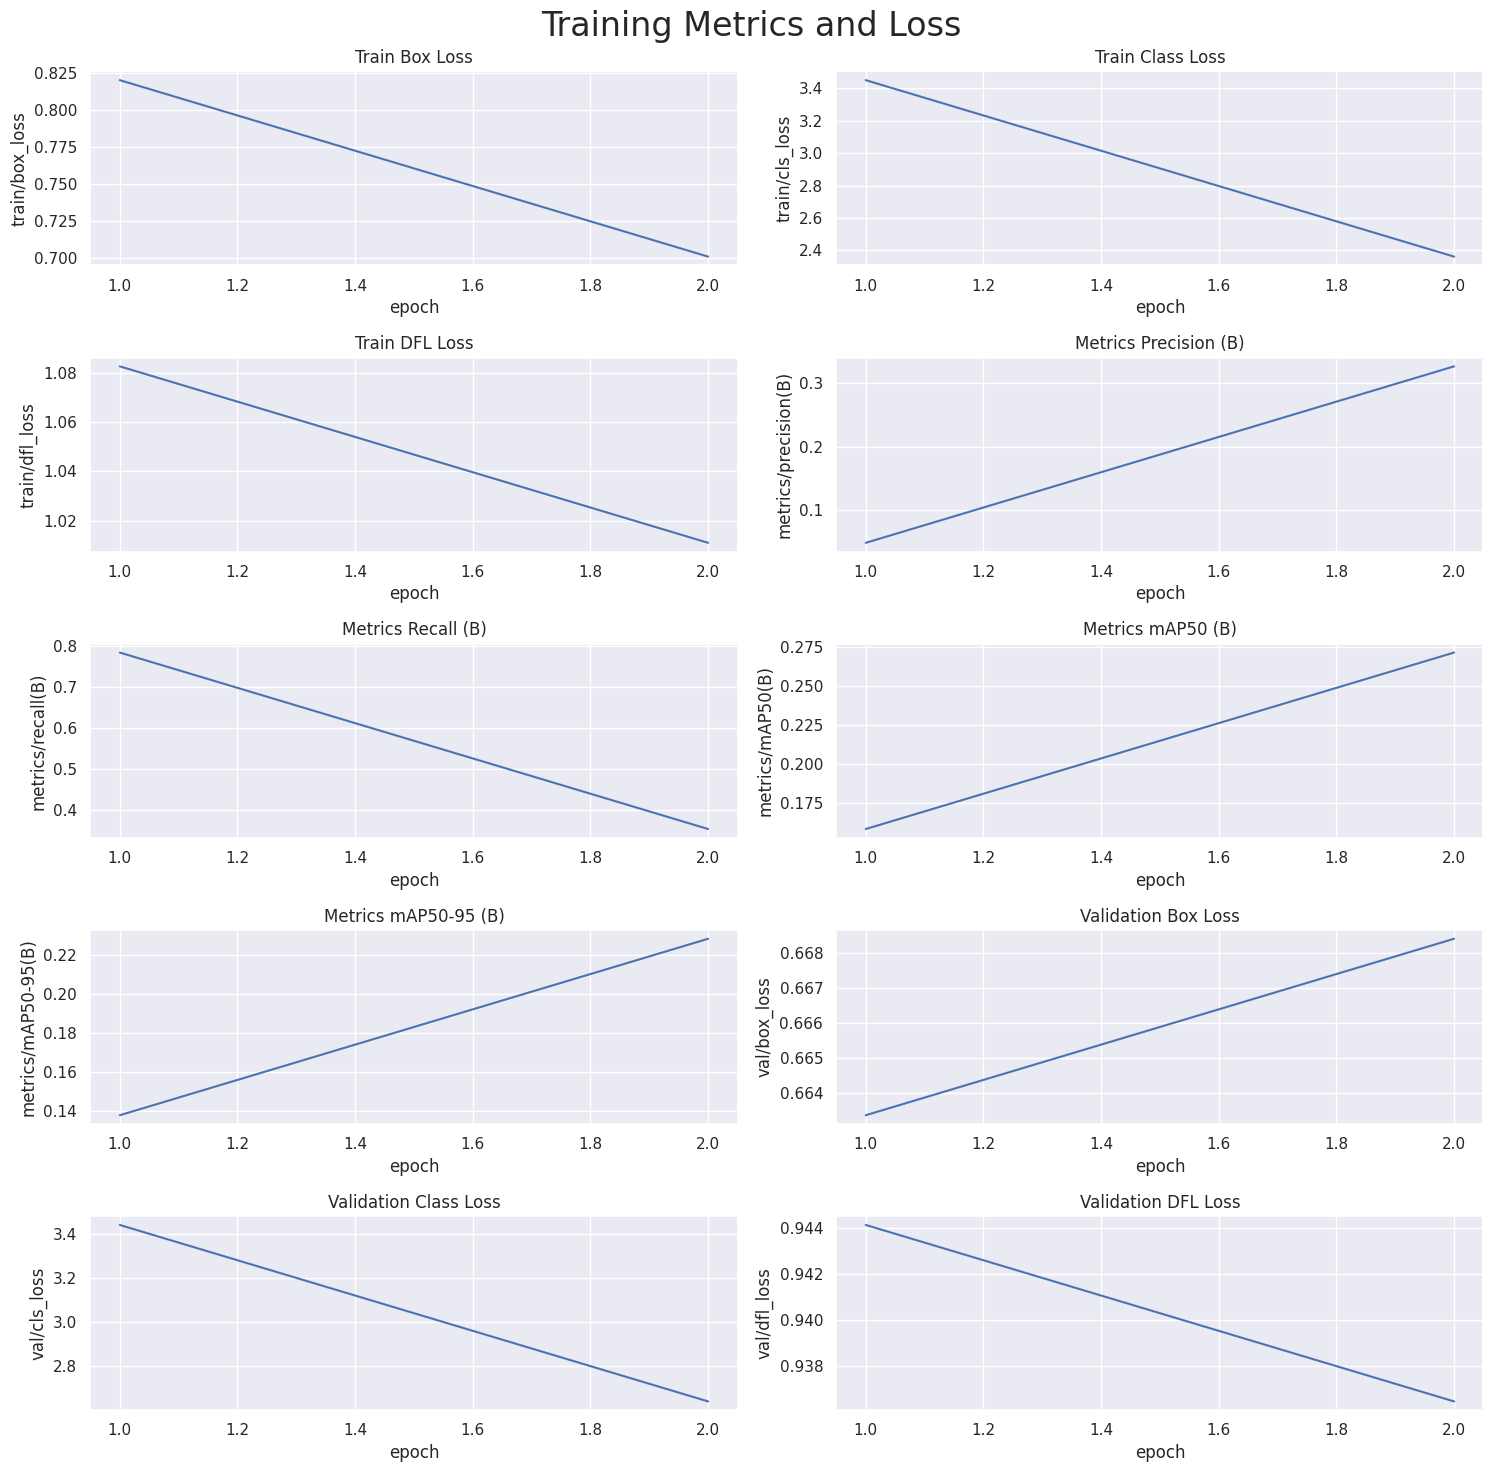

In [ ]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = df.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

## Validation By TestSet

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/cardetection/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<00:00, 1050.82it/s]


val: New cache created: /content/cardetection/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [01:27<00:00,  2.20s/it]


                   all        638        770      0.303      0.333      0.259      0.218
           Green Light        638        110      0.455      0.109        0.3      0.172
             Red Light        638         94      0.417      0.138       0.22      0.128
        Speed Limit 10        638          3          1          0      0.107      0.064
       Speed Limit 100        638         46     0.0437     0.0217     0.0867     0.0733
       Speed Limit 110        638         21      0.123      0.143      0.145      0.131
       Speed Limit 120        638         44      0.242      0.591      0.308      0.273
        Speed Limit 20        638         46      0.272      0.826      0.656      0.591
        Speed Limit 30        638         60      0.206        0.6      0.227      0.201
        Speed Limit 40        638         53      0.205      0.132       0.22      0.188
        Speed Limit 50        638         50      0.118       0.46      0.105     0.0929
        Speed Limit 6

In [ ]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.3032919648796663
metrics/recall(B):  0.3329564662863946
metrics/mAP50(B):  0.25873732784642917
metrics/mAP50-95(B):  0.21773366227221597


## Haciendo predicciones on test

In [ ]:
# Path to the directory containing the images
image_dir = '/content/cardetection/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 (no detections), 165.2ms
Speed: 2.2ms preprocess, 165.2ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train22

0: 416x416 1 Speed Limit 20, 124.7ms
Speed: 2.1ms preprocess, 124.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train23

0: 416x416 (no detections), 119.4ms
Speed: 2.1ms preprocess, 119.4ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train24

0: 416x416 (no detections), 113.2ms
Speed: 1.9ms preprocess, 113.2ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train25

0: 416x416 (no detections), 120.9ms
Speed: 1.9ms preprocess, 120.9ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train26

0: 416x416 (no detections), 166.2ms
Speed: 2.5ms preprocess, 166.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Resu

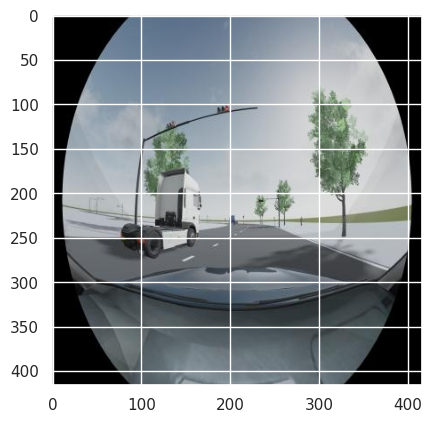

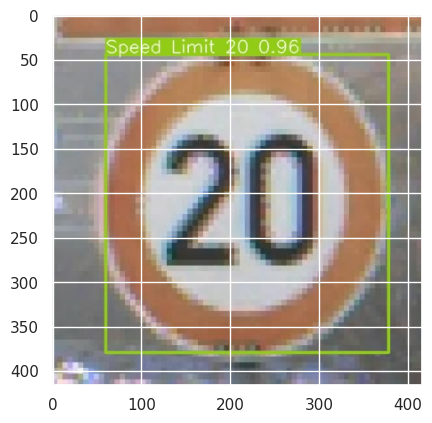

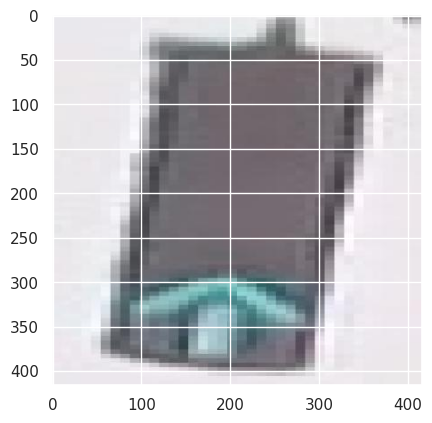

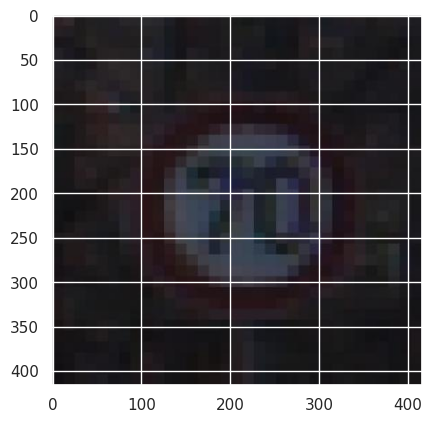

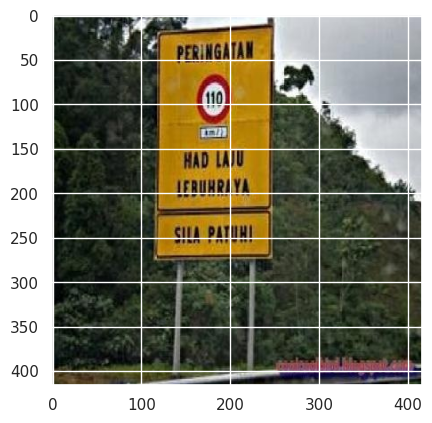

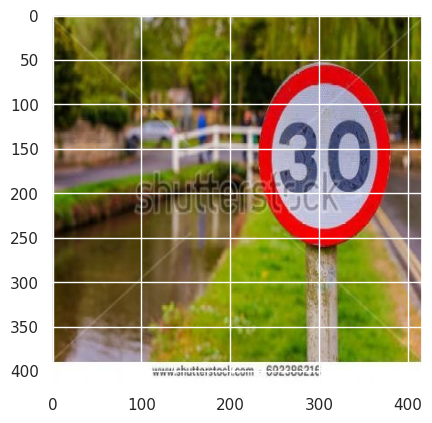

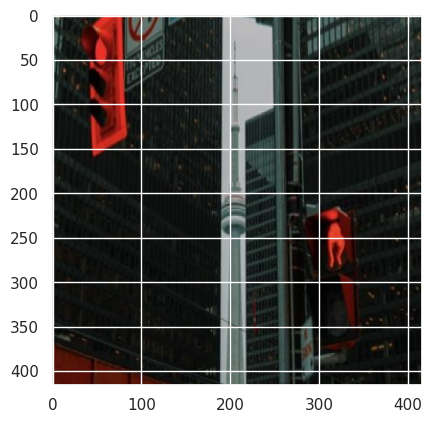

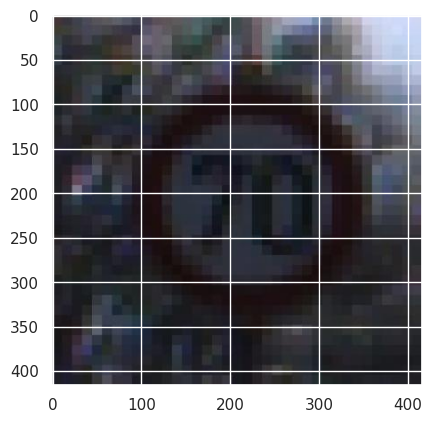

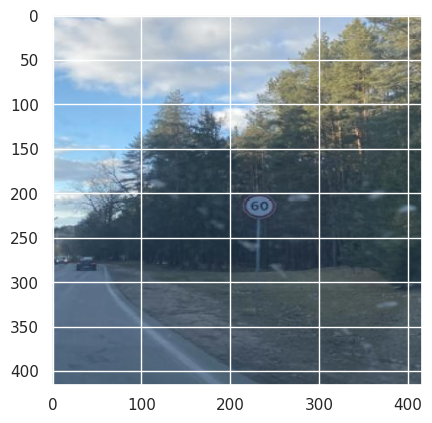

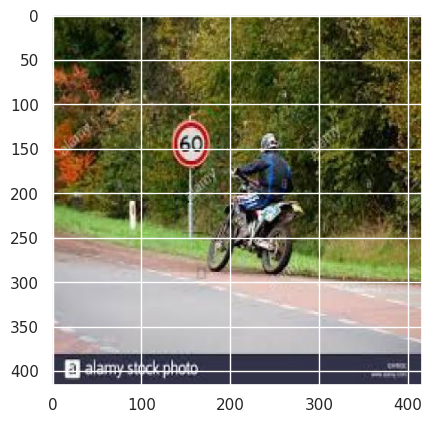

In [ ]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train2{i}/image0.jpg'))
    plt.show()